<a href="https://colab.research.google.com/github/mariegulstad/IS4447LABS/blob/main/Module6_Script_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 11

## Outline

What do you need to know for this module's project?

1. Fit a tree model using all the available predictors.
2. Create a confusion matrix  and identify numbers of TP, FP, TN and FN.
3. Estimate profit (benefits - costs) using a defined cost-benefit matrix and the above confusion matrix.
4. Estimate profit for a strategy that consists in calling everyone.
5. Estimate profit for a class decision threshold of .3
6.  Use the model to predict on a new dataset (without the target), then use these predictions to identify those who should be called--a contact list.
7.  Make a recommendation to the Director of Sales based on your analytic work.

**NOTE:** For the module 5 project you will predict answering for prospective customers (who have not yet been called). Consequently, the assignment requires an additional dataset, customer_data.csv, that you will need to download and move into your project folder.  Here is code to load that data into memory after you have it saved in your project folder (your working directory). This code is included in the template script.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab11_megatelco_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco_leave_survey.csv data

**Note:** you will need to enter a code supplied by Google in the next step.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/megatelco_leave_survey (2).csv')


Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

In [5]:
#describe the data before cleaning it
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts?

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [6]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna()

df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,79911.270525,85.114738,24.244694,493946.252903,387.616340,7.739287,5.957549,10032.925110
std,41683.689543,85.610045,26.844259,253599.007645,213.659555,8.802897,4.389439,5815.013219
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41591.500000,0.000000,0.000000,260741.500000,219.000000,1.000000,2.000000,4943.000000
50%,74962.500000,59.000000,15.000000,452087.500000,322.000000,4.000000,5.000000,10124.000000
75%,115497.000000,177.000000,42.000000,701612.250000,528.000000,14.000000,9.000000,15082.750000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


# Standardize attributes

- Convert "college" to 0,1
- Convert reported_satisfaction to 1,2,3
- Convert reported_usage_level to 1,2,3
- Convert considering_change_of_plan to 0,1
- Convert leave to 0,1

I'm going to leave the "leave" variable in place, just in case I need the original value

In [7]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1"
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean['college'] = df_clean['college'].astype('int')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('int')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('int')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('float')

#Add new field with binary value for leave
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')
df_clean['leave_flag'] = df_clean['leave_flag'].astype('bool')

df_clean.head(10)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,leave_flag
0,1,23859,70,0,519105,154,5.0,8,1,1,1.0,LEAVE,8183,True
1,0,72466,67,16,271182,262,5.0,5,1,1,1.0,LEAVE,12501,True
2,0,30883,60,0,647281,211,3.0,8,1,1,1.0,STAY,7425,False
3,1,44512,0,22,754958,232,0.0,5,1,1,0.0,LEAVE,13488,True
4,0,70535,0,0,653421,310,0.0,14,1,1,1.0,STAY,11389,False
5,0,143987,0,56,896544,778,5.0,1,1,3,1.0,STAY,14674,False
6,1,96668,79,24,259329,365,5.0,6,1,2,1.0,LEAVE,19100,True
7,1,50083,0,0,160335,266,5.0,10,1,3,1.0,STAY,18170,False
8,1,104392,0,0,247836,778,1.0,8,3,1,0.0,LEAVE,3201,True
9,1,37852,0,74,264893,857,0.0,2,1,1,1.0,LEAVE,12612,True


# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [8]:
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      4994 non-null   category
 1   income                       4994 non-null   int64   
 2   overage                      4994 non-null   int64   
 3   leftover                     4994 non-null   int64   
 4   house                        4994 non-null   int64   
 5   handset_price                4994 non-null   int64   
 6   over_15mins_calls_per_month  4994 non-null   float64 
 7   average_call_duration        4994 non-null   int64   
 8   reported_satisfaction        4994 non-null   category
 9   reported_usage_level         4994 non-null   category
 10  considering_change_of_plan   4994 non-null   category
 11  leave                        4994 non-null   category
 12  id                           4994 non-null   int64   
 13  lea

# What is the base probability of leaving?

If we use no model at all, how good is our chance of predicting someone leaving?

In [9]:
df_clean['leave_flag'].mean()

0.4941930316379656

#Split the training and testing datasets

In [10]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house','college','overage','leftover','handset_price','over_15mins_calls_per_month','average_call_duration']] #,'reported_satisfaction','reported_usage_level','considering_change_of_plan']]
y = df_clean['leave_flag']

#place 20% of data in a test dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Fit a basic tree model

Use all available attributes

In [11]:


megatelco_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco_tree = megatelco_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = megatelco_tree.predict(x_test)




## What is the accuracy?

Is it better than the 49% base probability?

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7017017017017017


# Create a confusion matrix

This will show false positives, true positives, etc.

In [13]:
# create a confusion matrix
megatelco_tree_matrix = confusion_matrix(y_test, y_predict)
print(megatelco_tree_matrix)

[[300 192]
 [106 401]]


## Plot the confusion matrix

We will use a Seaborn library for this

[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

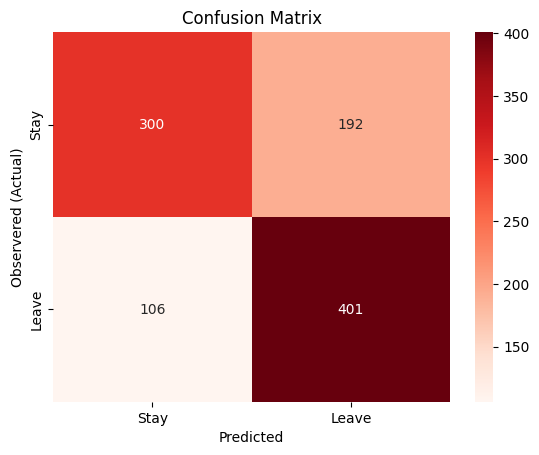

In [14]:
#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

## Calculate Profit

Using the confusion matrix in the previous question how much profit (revenue - costs) could be expected with these costs-benefits?

For MegaTelCo we will assume benefit (revenue) = 800 and cost = 200.  TPs are a benefit, FPs are a cost. Again, we ignore those predicted to stay. (The cost-benefit numbers will be different in the AdviseInvest case! )

Why are TPs a benefit? In the MegaTelCo scenario, these are customers who are predicted to leave and actually were going to leave. If your marketing campaign is successful, then you can convince them to stay, thereby saving the company money. (In the AdviseInvest scenario, TPs are customers that you have predicted will answer the phone and do answer, thus providing an opportunity for your sales reps to make a sale.)

**Assume you can save 100% of the people who were actually going to leave.**  

In [15]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
375 * (800-200) - 114 * 200

202200

## Fine tune the model

Adjust the threshold for giving offers down to 0.2.  What happens to profit?

The default threshold is 0.5 or 50% likely to make a choice.  If we adjust to 0.20, we are looking for customers with even a 20% chance of leaving.   This will lead to more offers being made and more false positives.  



In [16]:


megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.2)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)



[[ 91 401]
 [ 18 489]]


## Create a new confusion matrix

[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

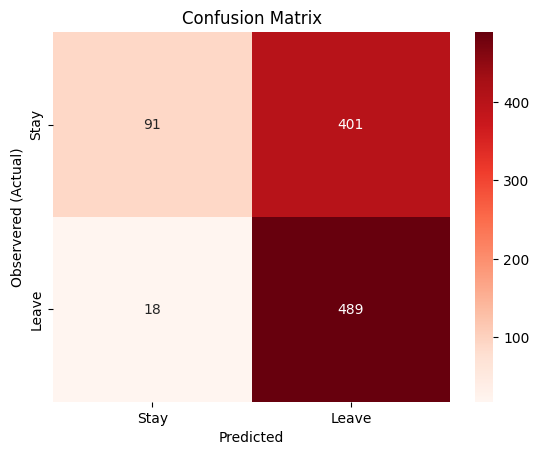

In [17]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])


## Calculate profite for new model

In [18]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
( 469 * (800-200)) - (20 * 200)

277400

## Optimize the Model

➡️ Assignment Tasks
What is the optimal profit possible?  Iterate through multiple probability levels to find the shape of the profitability curve.
- Create at least 5 different confusion matrix versions at different probability levels.   Your last version should be the most profitable

In [ ]:
#version 1


In [21]:
megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.75)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)

[[445  47]
 [328 179]]


[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

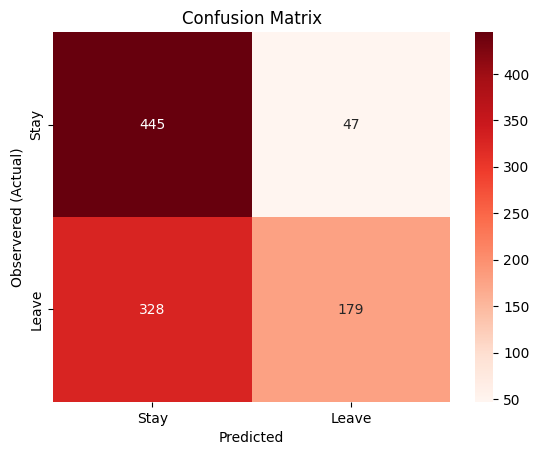

In [22]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

In [25]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
(445 * (800-200)) - (328 * 200)

201400

In [ ]:
#version 2

In [45]:
megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.55)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)

[[377 115]
 [198 309]]


[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

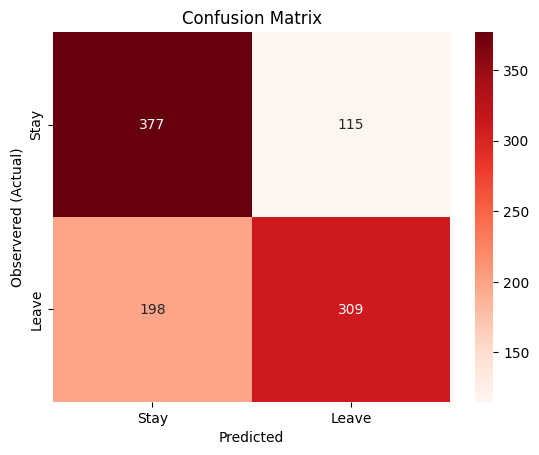

In [46]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

In [47]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
(377 * (800-200)) - (198 * 200)

186600

In [ ]:
#version 3

In [42]:
megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.65)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)

[[443  49]
 [304 203]]


[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

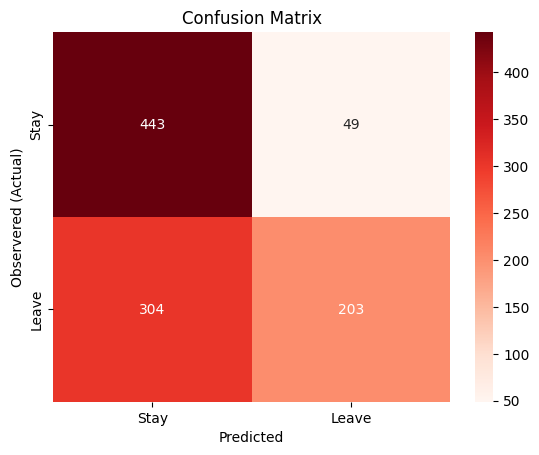

In [43]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

In [44]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
(443 * (800-200)) - (304 * 200)

205000

In [ ]:
#version 4

In [39]:
megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.80)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)

[[475  17]
 [434  73]]


[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

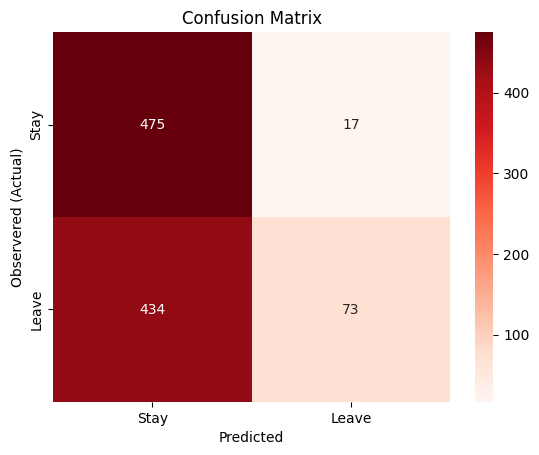

In [40]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

In [41]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
(475 * (800-200)) - (434 * 200)

198200

In [74]:
#version 5
megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.72)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)

[[443  49]
 [304 203]]


[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

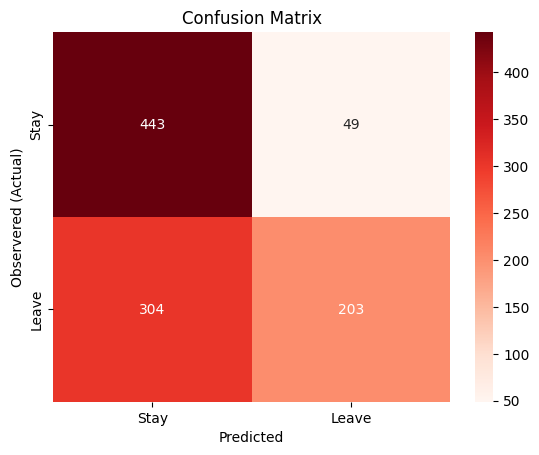

In [75]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

In [76]:
# True leavers * 600 -> You rescued these leave-leave people
# False leavers * 200 -> You wasted your money on the leave-stay people since they weren't actually going to leave
(443 * (800-200)) - (304 * 200)

205000

In [77]:
%%shell
jupyter nbconvert --to html /content/Copy_of_Module6_Script_v1_5.ipynb

[NbConvertApp] Converting notebook /content/Copy_of_Module6_Script_v1_5.ipynb to html
[NbConvertApp] Writing 898715 bytes to /content/Copy_of_Module6_Script_v1_5.html
